# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [2]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [00:55, 3.07MB/s]                              


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 3:
Samples: 10000
Label Counts: {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
First 20 Labels: [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2]

Example of Image 502:
Image - Min Value: 0 Max Value: 236
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


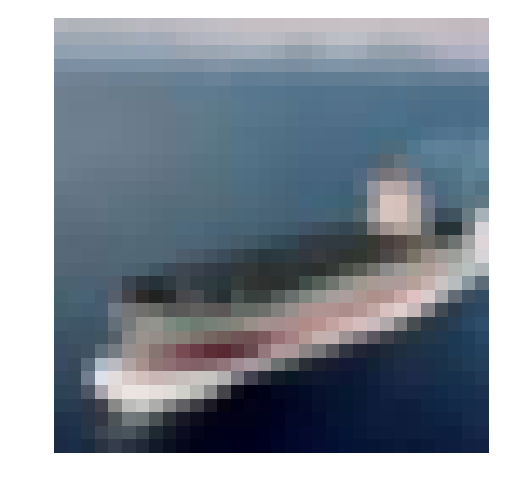

In [7]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 3
sample_id = 502
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [9]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return np.divide(x,255)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [13]:
from sklearn import  preprocessing
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """

    if 'binarizer' not in globals():
        global binarizer
        binarizer=preprocessing.LabelBinarizer()
        binarizer.fit(x)
    return binarizer.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [14]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [2]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # Set the shape using image_shape with batch size set to None.
    image_shape=(None,)+image_shape

    # Return a TF Placeholder
    # Name the TensorFlow placeholder "x" using the TensorFlow name parameter in the TF Placeholder.
    return tf.placeholder(tf.float32, image_shape, name="x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # Set the shape using n_classes with batch size set to None.
    n_classes=(None,n_classes)
    # Return a TF Placeholder
    # Name the TensorFlow placeholder "y" using the TensorFlow name parameter in the TF Placeholder.
    return tf.placeholder(tf.float32, n_classes, name="y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """

    # Return a TF Placeholder for dropout keep probability.
    # Name the TensorFlow placeholder "keep_prob" using the TensorFlow name parameter in the TF Placeholder.
    return tf.placeholder(tf.float32, name="keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [3]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    
    # Create the weight and bias using conv_ksize, conv_num_outputs and the shape of x_tensor.
    (_, _, _, depth) =x_tensor.shape # extract shape
    filter_size_height=conv_ksize[0]
    filter_size_width =conv_ksize[1]
    
#     # The instruction says it's not allowed to use contrib.layers but I'm pretty sure it didn't mean the weight initializer.
#     # use glorot_uniform distribution https://www.tensorflow.org/api_docs/python/tf/contrib/layers/xavier_initializer
#     weight = tf.get_variable("conv_weight", 
#                              shape=[filter_size_height, filter_size_width, depth.value, conv_num_outputs], 
#                              initializer=tf.contrib.layers.xavier_initializer_conv2d())

    weight = tf.Variable(tf.truncated_normal(
        [filter_size_height, filter_size_width, depth.value, conv_num_outputs]
        ))
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    # Apply a convolution to x_tensor using weight and conv_strides
    conv_strides = (1,)+conv_strides+(1,) # use strined of 1 for each sample in the bacth and color channel
    conv_layer = tf.nn.conv2d(x_tensor, weight, strides=conv_strides, padding="SAME")
    # Add bias
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    # Add a nonlinear activation to the convolution.
    conv_layer = tf.nn.relu(conv_layer)
    
    # Apply Max Pooling using pool_ksize and pool_strides.
    pool_ksize=(1,)+pool_ksize+(1,)
    pool_strides=(1,)+pool_strides+(1,)
    conv_layer = tf.nn.max_pool(conv_layer, ksize=pool_ksize, strides=pool_strides, padding="SAME")
    return conv_layer

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [4]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # Flatten x_tensor to (Batch Size, Flattened Image Size)
    (_, h, w, d) =x_tensor.shape # extract shape as TF's Dimension objects
    # flattened image size
    flattened_size=h*w*d    
    return tf.reshape(x_tensor, [-1, flattened_size.value])
    pass


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [5]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    
    (_, size) =x_tensor.shape # extract shape as TF's Dimension objects
    
#     # use glorot_uniform distribution https://www.tensorflow.org/api_docs/python/tf/contrib/layers/xavier_initializer
#     weight = tf.get_variable("dense_weight",
#                              shape=[size.value, num_outputs],
#                              initializer=tf.contrib.layers.xavier_initializer())
    weight = tf.Variable(tf.truncated_normal(
        [size.value, num_outputs]
        ))
    bias = tf.Variable(tf.zeros(num_outputs))
    
    fc = tf.add(tf.matmul(x_tensor, weight), bias)
    return tf.nn.relu(fc)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [6]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    (_, size) =x_tensor.shape # extract shape as TF's Dimension objects    
    
#     # use glorot_uniform distribution https://www.tensorflow.org/api_docs/python/tf/contrib/layers/xavier_initializer
#     weight = tf.get_variable("out_weight", 
#                              shape=[size.value, num_outputs],
#                              initializer=tf.contrib.layers.xavier_initializer())

    weight = tf.Variable(tf.truncated_normal(
        [size.value, num_outputs]
        ))
    bias = tf.Variable(tf.zeros(num_outputs))

    return tf.add(tf.matmul(x_tensor, weight), bias)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [16]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    layer=conv2d_maxpool(x, 128, (5,5), (1,1), (2,2), (2,2))

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    layer=flatten(layer)
    layer=tf.nn.dropout(layer, keep_prob)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    layer=fully_conn(layer, 8192)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)    
    layer = output(layer, 10)

    # TODO: return output
    return layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [9]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: keep_probability
    })
    pass


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [10]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # bacth 
    batch_loss = session.run(cost, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1.0
    })
    batch_accuracy = session.run(accuracy, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1.0
    })
    # validation
    valid_loss = session.run(cost, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1.0
    })
    valid_accuracy = session.run(accuracy, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1.0
    })

    print('Loss: {:>5.0f}, '.format(batch_loss), end='')
    print("Accuracy: {:2.2f}%, | ".format(batch_accuracy*100), end='')
    print('Valication Loss: {:>5.0f}, '.format(valid_loss), end='')
    print("Valication Accuracy: {:2.2f}%".format(valid_accuracy*100), end='')
    print()
    return (batch_loss, batch_accuracy, valid_loss, valid_accuracy)

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

# Seeking optimal parameters 
To find optimal architecture and parameters let's grid search the space of parameters.

But first we need to declare some helper sunctions.

One more thing: since I have access to 1080Ti I used all batches for the search because in the preliminary tests I found that throwing more data at model migh have unexpected consequences with respect to final results. If the model is too small training it with more data might negatively impact its classification ability.


In [108]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=[12,8]
from six.moves import cPickle as pickle
import numpy as np

def plot_accuracy(valid_accuracy, batch_accuracy, xlim=(10,None), ylim=(0.4,None), logscale=False):
    plt.plot(valid_accuracy, label='Val accuracy')
    plt.plot(batch_accuracy, label='Batch accuracy')
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    if logscale:
        plt.yscale('log')
    plt.ylim(ylim)
    plt.xlim(xlim)  # cut off the early results
    plt.legend()
    _ = plt.ylim()
    plt.show()


def get_stats(session, feature_batch, label_batch, cost, accuracy):
    # bacth 
    batch_accuracy = session.run(accuracy, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1.0
    })
    # validation
    if 'valid_batch_size' not in globals():
        global valid_batch_size
        valid_batch_size=len(valid_features)
    valid_accuracy = session.run(accuracy, feed_dict={
        x: valid_features[:valid_batch_size],
        y: valid_labels[:valid_batch_size],
        keep_prob: 1.0
    })

    return (batch_accuracy, valid_accuracy)


def test_net(epochs, keep_probability=1.0, dn=2048, cf=16, early_stop=4, n_batches=5, 
             create_conv_net=create_conv_net, conv_ksize=(5,5), conv_strides=(1,1)):
    # Remove previous weights, bias, inputs, etc..
    tf.reset_default_graph()

    # Inputs
    global x, y, keep_prob
    x = neural_net_image_input((32, 32, 3))
    y = neural_net_label_input(10)
    keep_prob = neural_net_keep_prob_input()

    # Model
    logits = create_conv_net(x, keep_probability, dn, cf,
                            conv_ksize=conv_ksize, conv_strides=conv_strides)
    #logits = conv_net(x, kp)#, dn, cf)

    # Name logits Tensor, so that is can be loaded from disk after training
    logits = tf.identity(logits, name='logits')

    # Loss and Optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)

    # Accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

#    tests.test_conv_net(conv_net)
    
    with tf.Session() as sess:
        # Initializing the variables
        sess.run(tf.global_variables_initializer())

        # Training cycle
        batch_accuracy=[]
        valid_accuracy=[]
        for epoch in range(epochs):
            # Loop over all batches
            for batch_i in range(1, n_batches + 1):
                for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                    train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
                (ba, va) = get_stats(sess, batch_features, batch_labels, cost, accuracy)
                batch_accuracy.append(ba)
                valid_accuracy.append(va)
            # XXX: naive early stopping
            if epoch>early_stop:
#                 print("{:2.0f}% < {:2.0f}% ".format(100*np.mean(valid_accuracy[-(early_stop//2)*n_batches:]),
#                                                     100*np.mean(valid_accuracy[-early_stop*n_batches:])), end='')                
                if (np.mean(valid_accuracy[-(early_stop//2)*n_batches:])<np.mean(valid_accuracy[-early_stop*n_batches:])):
                    print("Max Val Acc: {:2.2f}% | Early Stop Epoch: {}".format(max(valid_accuracy)*100, epoch))
                    return (batch_accuracy,valid_accuracy)
                
        print("Max Val Acc: {:2.2f}%".format(max(valid_accuracy)*100))
        
        return (batch_accuracy,valid_accuracy)
    

# grid search parameters
def find_optimal_hyperparameters(epochs=230, 
                                 keep_probability=(0.7, 0.8, 0.9, 1.0),
                                 dense_neurons=(256,1024,2048,4096), 
                                 conv_filters=(16,32,64),
                                 early_stop=4, n_batches=5,
                                 create_conv_net=create_conv_net,
                                 conv_ksize=(5,5), conv_strides=(1,1),
                                ):
    kp_a=[]
    kp_va=[]
    for kp in keep_probability:
        dn_a=[]
        dn_va=[]
        for dn in dense_neurons:
            cf_a=[]
            cf_va=[]
            for cf in conv_filters:
                print ('Testing keep_probability: {:>2.2f},  dense_neurons: {:>4.0f},  conv_filters: {:3.0f}  |  '.format(kp, dn, cf), end='')
                (ba, va) = test_net(epochs, kp, dn, cf, early_stop, n_batches,
                                   create_conv_net=create_conv_net, conv_ksize=conv_ksize, conv_strides=conv_strides)
                cf_a.append(ba)
                cf_va.append(va)
            dn_a.append(cf_a)
            dn_va.append(cf_va)
        kp_a.append(dn_a)
        kp_va.append(dn_va)
    return (kp_a, kp_va)

    

### Simplistic design
To get some idea about optimal parameters I start with the simplistic network design: one Conv+pool, one dropot and one dense layer followed by output classifier. Then search the parameter's space of:
```
                                 keep_probability=(0.7, 0.8, 0.9, 1.0),
                                 dense_neurons=(256,1024,2048,4096), 
                                 conv_filters=(16,32,64)
```
The convolution and pooling hyper parameters are arbitrary, 5x5 kernel without striding for convolution and 2x2 max pooling with 2x2 striding (BTW: it makes no practical meaning to implement different striding and kernel for the pooling layer).

For the number of neurons in the hidden layer and number of convolution filtes the range is quite robust but since I got no clue for right direction I had to guess.

In [18]:
def create_conv_net(x, keep_prob=1.0, dense_neurons=8196, conv_filters=128,
                   conv_ksize=(5,5), conv_strides=(1,1)):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    # Input shape: 32x32x3=3072
    layer=conv2d_maxpool(x, conv_filters, conv_ksize, conv_strides, (2,2), (2,2))
    # Number of params: (5*5*3+1)*64 = 4864
    # Out shape: 16*16*64=16384

    layer=flatten(layer)
    layer=tf.nn.dropout(layer, keep_prob)

    # Out shape: 16*16*64=16384
    layer=fully_conn(layer, dense_neurons)
    # Number of params: (16384+1)*2048=33,556,480
    # Out shape: 2048
    
    # Input shape: 2048
    layer = output(layer, 10)
    # Number of params: (2048+1)*10=20490
    # Out shape: 10
    return layer

In [823]:
%%time
keep_probability=(0.7, 0.8, 0.9, 1.0)
dense_neurons=(256,1024,2048,4096)
conv_filters=(16,32,64)
batch_size = 256

# (batch_accuracy,valid_accuracy) = find_optimal_hyperparameters(keep_probability=keep_probability, 
#                                                                dense_neurons=dense_neurons,
#                                                                conv_filters=conv_filters)

# with open("batch_accuracy-exp1.pickle", 'wb') as f:
#     pickle.dump(batch_accuracy, f, pickle.HIGHEST_PROTOCOL)
# with open("valid_accuracy-exp1.pickle", 'wb') as f:
#     pickle.dump(valid_accuracy, f, pickle.HIGHEST_PROTOCOL)

Testing keep_probability: 0.70,  dense_neurons:  256,  conv_filters:  16  |  Max Val Acc: 21.30% | Early Stop Epoch: 5
Testing keep_probability: 0.70,  dense_neurons:  256,  conv_filters:  32  |  Max Val Acc: 18.92% | Early Stop Epoch: 5
Testing keep_probability: 0.70,  dense_neurons:  256,  conv_filters:  64  |  Max Val Acc: 18.56% | Early Stop Epoch: 5
Testing keep_probability: 0.70,  dense_neurons: 1024,  conv_filters:  16  |  Max Val Acc: 22.18% | Early Stop Epoch: 5
Testing keep_probability: 0.70,  dense_neurons: 1024,  conv_filters:  32  |  Max Val Acc: 27.52% | Early Stop Epoch: 5
Testing keep_probability: 0.70,  dense_neurons: 1024,  conv_filters:  64  |  Max Val Acc: 32.46% | Early Stop Epoch: 5
Testing keep_probability: 0.70,  dense_neurons: 2048,  conv_filters:  16  |  Max Val Acc: 27.34% | Early Stop Epoch: 5
Testing keep_probability: 0.70,  dense_neurons: 2048,  conv_filters:  32  |  Max Val Acc: 32.94% | Early Stop Epoch: 5
Testing keep_probability: 0.70,  dense_neurons: 

In [18]:
with open("batch_accuracy-exp1.pickle", 'rb') as f:
    batch_accuracy=np.array(pickle.load(f))
with open("valid_accuracy-exp1.pickle", 'rb') as f:
    valid_accuracy=np.array(pickle.load(f))
keep_probability=(0.7, 0.8, 0.9, 1.0)
dense_neurons=(256,1024,2048,4096)
conv_filters=(16,32,64)
batch_size = 256

In [19]:
# construct the array of maximum validation accuracies
max_valid_accuracy_array=np.array([[[max(cf) for cf in dn] for dn in kp] for kp in valid_accuracy])

# FInd the index for maximum val acc
mvaa_idx=np.unravel_index(np.argmax(max_valid_accuracy_array), max_valid_accuracy_array.shape)
print ("Max Validation Accuracy index {} ".format(mvaa_idx), end='')
print("| Maximum Accuracy: {:2.2f}%".format(100*max_valid_accuracy_array[mvaa_idx]))
#print(max_valid_accuracy_array)


Max Validation Accuracy index (3, 3, 2) | Maximum Accuracy: 55.06%


In [20]:
import pandas as pd
from IPython.display import display

i=0
for kp in keep_probability:
    minlosses_df=pd.DataFrame(max_valid_accuracy_array[i], columns=conv_filters, index=dense_neurons)
    display(minlosses_df.style.highlight_max(axis=0))
    print ("Keep probability {}%".format(kp))
    i+=1
i=0
for kp in keep_probability:
    minlosses_df=pd.DataFrame(max_valid_accuracy_array[i], columns=conv_filters, index=dense_neurons)
    display(minlosses_df.style.highlight_max(axis=1))
    print ("Keep probability {}%".format(kp))
    i+=1

,16,32,64
256,0.213,0.1892,0.1856
1024,0.2218,0.2752,0.3246
2048,0.2734,0.3294,0.39
4096,0.2782,0.3478,0.379


Keep probability 0.7%


,16,32,64
256,0.2348,0.2092,0.244
1024,0.2322,0.318,0.342
2048,0.2886,0.3356,0.4068
4096,0.2998,0.3832,0.48


Keep probability 0.8%


,16,32,64
256,0.2452,0.2468,0.2768
1024,0.2852,0.3354,0.3932
2048,0.316,0.3692,0.5056
4096,0.3686,0.4562,0.5144


Keep probability 0.9%


,16,32,64
256,0.3,0.3976,0.494
1024,0.485,0.5138,0.5234
2048,0.471,0.4958,0.5002
4096,0.493,0.498,0.5506


Keep probability 1.0%


,16,32,64
256,0.213,0.1892,0.1856
1024,0.2218,0.2752,0.3246
2048,0.2734,0.3294,0.39
4096,0.2782,0.3478,0.379


Keep probability 0.7%


,16,32,64
256,0.2348,0.2092,0.244
1024,0.2322,0.318,0.342
2048,0.2886,0.3356,0.4068
4096,0.2998,0.3832,0.48


Keep probability 0.8%


,16,32,64
256,0.2452,0.2468,0.2768
1024,0.2852,0.3354,0.3932
2048,0.316,0.3692,0.5056
4096,0.3686,0.4562,0.5144


Keep probability 0.9%


,16,32,64
256,0.3,0.3976,0.494
1024,0.485,0.5138,0.5234
2048,0.471,0.4958,0.5002
4096,0.493,0.498,0.5506


Keep probability 1.0%


It's clear that we get best results for bigger networks with more convolution filers and more neurons in hidden layers so we should investigate in this direction.

In [14]:
keep_probability=(0.8, 1.0)
dense_neurons=(4096, 5120, 6144, 8192)
conv_filters=(64, 80, 96, 128)
batch_size = 128

# (batch_accuracy,valid_accuracy) = find_optimal_hyperparameters(keep_probability=keep_probability, 
#                                                                dense_neurons=dense_neurons,
#                                                                conv_filters=conv_filters,
#                                                                early_stop=6
#                                                               )

# with open("batch_accuracy-exp2.pickle", 'wb') as f:
#     pickle.dump(batch_accuracy, f, pickle.HIGHEST_PROTOCOL)
# with open("valid_accuracy-exp2.pickle", 'wb') as f:
#     pickle.dump(valid_accuracy, f, pickle.HIGHEST_PROTOCOL)

Testing keep_probability: 0.80,  dense_neurons: 4096,  conv_filters:  64  |  Max Val Acc: 41.56% | Early Stop Epoch: 7
Testing keep_probability: 0.80,  dense_neurons: 4096,  conv_filters:  80  |  Max Val Acc: 41.70% | Early Stop Epoch: 7
Testing keep_probability: 0.80,  dense_neurons: 4096,  conv_filters:  96  |  Max Val Acc: 56.66% | Early Stop Epoch: 63
Testing keep_probability: 0.80,  dense_neurons: 4096,  conv_filters: 128  |  Max Val Acc: 57.84% | Early Stop Epoch: 41
Testing keep_probability: 0.80,  dense_neurons: 5120,  conv_filters:  64  |  Max Val Acc: 40.34% | Early Stop Epoch: 7
Testing keep_probability: 0.80,  dense_neurons: 5120,  conv_filters:  80  |  Max Val Acc: 53.62% | Early Stop Epoch: 41
Testing keep_probability: 0.80,  dense_neurons: 5120,  conv_filters:  96  |  Max Val Acc: 53.02% | Early Stop Epoch: 32
Testing keep_probability: 0.80,  dense_neurons: 5120,  conv_filters: 128  |  Max Val Acc: 57.82% | Early Stop Epoch: 44
Testing keep_probability: 0.80,  dense_neur

In [ ]:
with open("batch_accuracy-exp2.pickle", 'rb') as f:
    batch_accuracy=np.array(pickle.load(f))
with open("valid_accuracy-exp2.pickle", 'rb') as f:
    valid_accuracy=np.array(pickle.load(f))
keep_probability=(0.8, 1.0)
dense_neurons=(4096, 5120, 6144, 8192)
conv_filters=(64, 80, 96, 128)

In [15]:
# construct the array of maximum validation accuracies
max_valid_accuracy_array=np.array([[[max(cf) for cf in dn] for dn in kp] for kp in valid_accuracy])

# FInd the index for maximum val acc
mvaa_idx=np.unravel_index(np.argmax(max_valid_accuracy_array), max_valid_accuracy_array.shape)
print ("Max Validation Accuracy index {} ".format(mvaa_idx), end='')
print("| Maximum Accuracy: {:2.2f}%".format(100*max_valid_accuracy_array[mvaa_idx]))
#print(max_valid_accuracy_array)


Max Validation Accuracy index (1, 2, 2) | Maximum Accuracy: 61.98%


In [17]:
import pandas as pd
from IPython.display import display

i=0
for kp in keep_probability:
    minlosses_df=pd.DataFrame(max_valid_accuracy_array[i], columns=conv_filters, index=dense_neurons)
    display(minlosses_df.style.highlight_max(axis=0))
    print ("Keep probability {}%".format(kp))
    i+=1
i=0
for kp in keep_probability:
    minlosses_df=pd.DataFrame(max_valid_accuracy_array[i], columns=conv_filters, index=dense_neurons)
    display(minlosses_df.style.highlight_max(axis=1))
    print ("Keep probability {}%".format(kp))
    i+=1

,64,80,96,128
4096,0.4156,0.417,0.5666,0.5784
5120,0.4034,0.5362,0.5302,0.5782
6144,0.3882,0.5036,0.5296,0.5758
8192,0.423,0.5326,0.5616,0.5842


Keep probability 0.8%


,64,80,96,128
4096,0.5854,0.595,0.6016,0.6068
5120,0.6024,0.5784,0.5956,0.6004
6144,0.58,0.5768,0.6198,0.6148
8192,0.5886,0.5822,0.5898,0.6168


Keep probability 1.0%


,64,80,96,128
4096,0.4156,0.417,0.5666,0.5784
5120,0.4034,0.5362,0.5302,0.5782
6144,0.3882,0.5036,0.5296,0.5758
8192,0.423,0.5326,0.5616,0.5842


Keep probability 0.8%


,64,80,96,128
4096,0.5854,0.595,0.6016,0.6068
5120,0.6024,0.5784,0.5956,0.6004
6144,0.58,0.5768,0.6198,0.6148
8192,0.5886,0.5822,0.5898,0.6168


Keep probability 1.0%


The best results were obtained with the very big networks of 8196 nodes in dense layer and 128 convolution filters of 5x5 kernel.
Regularization with dropout is makeing everything worse which would indicate that the model could be even bigger.

Let's calculate the total number of parameters.

```
# Input shape: 32x32x3=3072
layer=conv2d_maxpool(x, 128, (5,5), (1,1), (2,2), (2,2))
# Number of params: (5*5*3+1)*128 = 9728
# Out shape: 16*16*128=32768

layer=flatten(layer)
layer=tf.nn.dropout(layer, keep_prob)

# Input shape: 32768
layer=fully_conn(layer, 8192)
# Number of params: (32768+1)*8196=268,443,648
# Out shape: 8192

# Input shape: 8192
layer = output(layer, 10)
# Number of params: (8192+1)*10=81,930
# Out shape: 10
```
Total params: 268,535,306

**Wow... a whooping 267 milion. **
How about going bigger?

How about bigger convolution kernels? 

In [83]:
%%time
keep_probability=(0.8, 1.0)
dense_neurons=(4096, 8192)
conv_filters=(64, 128)
conv_ksize=(32,32)
batch_size = 256

(batch_accuracy,valid_accuracy) = find_optimal_hyperparameters(keep_probability=keep_probability, 
                                                               dense_neurons=dense_neurons,
                                                               conv_filters=conv_filters, conv_ksize=conv_ksize)

Testing keep_probability: 0.80,  dense_neurons: 4096,  conv_filters:  64  |  Max Val Acc: 28.12% | Early Stop Epoch: 5
Testing keep_probability: 0.80,  dense_neurons: 4096,  conv_filters: 128  |  Max Val Acc: 31.25% | Early Stop Epoch: 5
Testing keep_probability: 0.80,  dense_neurons: 8192,  conv_filters:  64  |  Max Val Acc: 31.64% | Early Stop Epoch: 5
Testing keep_probability: 0.80,  dense_neurons: 8192,  conv_filters: 128  |  Max Val Acc: 30.86% | Early Stop Epoch: 5
Testing keep_probability: 1.00,  dense_neurons: 4096,  conv_filters:  64  |  Max Val Acc: 46.09% | Early Stop Epoch: 10
Testing keep_probability: 1.00,  dense_neurons: 4096,  conv_filters: 128  |  Max Val Acc: 46.09% | Early Stop Epoch: 10
Testing keep_probability: 1.00,  dense_neurons: 8192,  conv_filters:  64  |  Max Val Acc: 46.09% | Early Stop Epoch: 10
Testing keep_probability: 1.00,  dense_neurons: 8192,  conv_filters: 128  |  Max Val Acc: 47.66% | Early Stop Epoch: 16
CPU times: user 11min 31s, sys: 12min 16s, t

It might not be the best investigation of a subject but it seems that wider kernels are not beneficial with current network design. 

What I'm really curious about now are deeper models...


### Deeper networks
Let's try a deeper model with 3 convolutions and two fully connected layers.

In [105]:
def create_deep_conv_net(x, keep_prob=0.75, dense_neurons=(512,256), conv_filters=(48,96,192),
                   conv_ksize=(3,3), conv_strides=(1,1)):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Input shape: 32x32x3=3072
    layer=conv2d_maxpool(x, conv_filters[0], conv_ksize, conv_strides, (1,1), (1,1))
    # Number of params: (3*3*3+1)*48 = 1344
    layer=tf.nn.dropout(layer, keep_prob)
    # Out shape: 32*32*48=49152
    layer=conv2d_maxpool(x, conv_filters[1], conv_ksize, conv_strides, (1,1), (1,1))
    # Number of params: (3*3*48+1)*96 = 41568
    layer=tf.nn.dropout(layer, keep_prob)
    # Out shape: 32*32*96=98304
    layer=conv2d_maxpool(x, conv_filters[2], conv_ksize, conv_strides, (2,2), (2,2))
    # Number of params: (3*3*96+1)*192 = 16,6080
    # Out shape: 16*16*192=49152

    layer=flatten(layer)
    layer=tf.nn.dropout(layer, keep_prob)

    # In shape: 49152
    layer=fully_conn(layer, dense_neurons[0])
    # Number of params: (49152+1)*512 = 25,166,336
    layer=tf.nn.dropout(layer, keep_prob)
    # In shape: 512
    layer=fully_conn(layer, dense_neurons[1])
    # Number of params: (512+1)*256 = 131,328
    layer=tf.nn.dropout(layer, keep_prob)
    # Out shape: 256
    
    # Input shape: 256
    layer = output(layer, 10)
    # Number of params: (256+1)*10=2570
    # Out shape: 10
    return layer

# Total number of parameters: 25,509,226

Need to change a but the find_optimal_hyperparameters() function.

In [117]:
# grid search parameters
def find_optimal_hyperparameters(epochs=230, 
                                 keep_probability=(0.8),
                                 dense_neurons=((512,256),), 
                                 conv_filters=((48,96,192),),
                                 early_stop=4, n_batches=5,
                                 create_conv_net=create_conv_net,
                                 conv_ksize=(3,3), conv_strides=(1,1),
                                ):
    kp_a=[]
    kp_va=[]
    for kp in keep_probability:
        dn_a=[]
        dn_va=[]
        for dn in dense_neurons:
            cf_a=[]
            cf_va=[]
            for cf in conv_filters:
                print ('Testing keep_prob.: {:>2.2f},  dense_neurons: {:>4.0f},{:>4.0f},  conv_filters: {:3.0f},{:3.0f},{:4.0f}  |  '.format(kp, *dn, *cf), end='')
                (ba, va) = test_net(epochs, kp, dn, cf, early_stop, n_batches,
                                   create_conv_net=create_conv_net, conv_ksize=conv_ksize, conv_strides=conv_strides)
                cf_a.append(ba)
                cf_va.append(va)
            dn_a.append(cf_a)
            dn_va.append(cf_va)
        kp_a.append(dn_a)
        kp_va.append(dn_va)
    return (kp_a, kp_va)

Let's search some parameters...

In [119]:
keep_probability=(0.8, 1.0)
dense_neurons=((512,256),(1024,512))
conv_filters=((48,96,192),(64,128,256),)
conv_ksize=((3,3))
batch_size = 256
valid_batch_size=2000

# (batch_accuracy,valid_accuracy) = find_optimal_hyperparameters(keep_probability=keep_probability, 
#                                                                dense_neurons=dense_neurons,
#                                                                conv_filters=conv_filters, conv_ksize=conv_ksize,
#                                                               create_conv_net=create_deep_conv_net)
# with open("batch_accuracy-exp3.pickle", 'wb') as f:
#     pickle.dump(batch_accuracy, f, pickle.HIGHEST_PROTOCOL)
# with open("valid_accuracy-exp3.pickle", 'wb') as f:
#     pickle.dump(valid_accuracy, f, pickle.HIGHEST_PROTOCOL)

Testing keep_prob.: 0.80,  dense_neurons:  512, 256,  conv_filters:  48, 96, 192  |  Max Val Acc: 13.60% | Early Stop Epoch: 5
Testing keep_prob.: 0.80,  dense_neurons:  512, 256,  conv_filters:  64,128, 256  |  Max Val Acc: 14.95% | Early Stop Epoch: 5
Testing keep_prob.: 0.80,  dense_neurons: 1024, 512,  conv_filters:  48, 96, 192  |  Max Val Acc: 18.05% | Early Stop Epoch: 5
Testing keep_prob.: 0.80,  dense_neurons: 1024, 512,  conv_filters:  64,128, 256  |  Max Val Acc: 17.85% | Early Stop Epoch: 6
Testing keep_prob.: 1.00,  dense_neurons:  512, 256,  conv_filters:  48, 96, 192  |  Max Val Acc: 56.50% | Early Stop Epoch: 21
Testing keep_prob.: 1.00,  dense_neurons:  512, 256,  conv_filters:  64,128, 256  |  Max Val Acc: 51.65% | Early Stop Epoch: 11
Testing keep_prob.: 1.00,  dense_neurons: 1024, 512,  conv_filters:  48, 96, 192  |  Max Val Acc: 53.25% | Early Stop Epoch: 11
Testing keep_prob.: 1.00,  dense_neurons: 1024, 512,  conv_filters:  64,128, 256  |  Max Val Acc: 53.20% | E

In [120]:
with open("batch_accuracy-exp3.pickle", 'rb') as f:
    batch_accuracy=np.array(pickle.load(f))
with open("valid_accuracy-exp3.pickle", 'rb') as f:
    valid_accuracy=np.array(pickle.load(f))
keep_probability=(0.8, 1.0)
dense_neurons=((512,256),(1024,512))
conv_filters=((48,96,192),(64,128,256),)
conv_ksize=((3,3))
batch_size = 256
valid_batch_size=2000

In [121]:
# construct the array of maximum validation accuracies
max_valid_accuracy_array=np.array([[[max(cf) for cf in dn] for dn in kp] for kp in valid_accuracy])

# FInd the index for maximum val acc
mvaa_idx=np.unravel_index(np.argmax(max_valid_accuracy_array), max_valid_accuracy_array.shape)
print ("Max Validation Accuracy index {} ".format(mvaa_idx), end='')
print("| Maximum Accuracy: {:2.2f}%".format(100*max_valid_accuracy_array[mvaa_idx]))
#print(max_valid_accuracy_array)


Max Validation Accuracy index (1, 0, 0) | Maximum Accuracy: 56.50%


In [122]:
import pandas as pd
from IPython.display import display

i=0
for kp in keep_probability:
    minlosses_df=pd.DataFrame(max_valid_accuracy_array[i], columns=conv_filters, index=dense_neurons)
    display(minlosses_df.style.highlight_max(axis=0))
    print ("Keep probability {}%".format(kp))
    i+=1
i=0
for kp in keep_probability:
    minlosses_df=pd.DataFrame(max_valid_accuracy_array[i], columns=conv_filters, index=dense_neurons)
    display(minlosses_df.style.highlight_max(axis=1))
    print ("Keep probability {}%".format(kp))
    i+=1

,"(48, 96, 192)","(64, 128, 256)"
"(512, 256)",0.136,0.1495
"(1024, 512)",0.1805,0.1785


Keep probability 0.8%


,"(48, 96, 192)","(64, 128, 256)"
"(512, 256)",0.565,0.5165
"(1024, 512)",0.5325,0.532


Keep probability 1.0%


,"(48, 96, 192)","(64, 128, 256)"
"(512, 256)",0.136,0.1495
"(1024, 512)",0.1805,0.1785


Keep probability 0.8%


,"(48, 96, 192)","(64, 128, 256)"
"(512, 256)",0.565,0.5165
"(1024, 512)",0.5325,0.532


Keep probability 1.0%


In [124]:
keep_probability=(1.0,)
dense_neurons=((256,256),(256,512))
conv_filters=((32,48,64),(48,96,192))
conv_ksize=((3,3))
batch_size = 256
valid_batch_size=2000

(batch_accuracy,valid_accuracy) = find_optimal_hyperparameters(keep_probability=keep_probability, 
                                                               dense_neurons=dense_neurons,
                                                               conv_filters=conv_filters, conv_ksize=conv_ksize,
                                                              create_conv_net=create_deep_conv_net)
with open("batch_accuracy-exp4.pickle", 'wb') as f:
    pickle.dump(batch_accuracy, f, pickle.HIGHEST_PROTOCOL)
with open("valid_accuracy-exp4.pickle", 'wb') as f:
    pickle.dump(valid_accuracy, f, pickle.HIGHEST_PROTOCOL)

Testing keep_prob.: 1.00,  dense_neurons:  256, 256,  conv_filters:  32, 48,  64  |  Max Val Acc: 49.40% | Early Stop Epoch: 20
Testing keep_prob.: 1.00,  dense_neurons:  256, 256,  conv_filters:  48, 96, 192  |  Max Val Acc: 48.70% | Early Stop Epoch: 15
Testing keep_prob.: 1.00,  dense_neurons:  256, 512,  conv_filters:  32, 48,  64  |  Max Val Acc: 45.25% | Early Stop Epoch: 16
Testing keep_prob.: 1.00,  dense_neurons:  256, 512,  conv_filters:  48, 96, 192  |  Max Val Acc: 47.75% | Early Stop Epoch: 13


# Conclusion

The best resuts were obtained with simple model with one convolution and one hidden fully connected layer. Similar results could be achieved with a 3 times Conv2D layer and two dense layers and an order of magnitude less parameters (25.5 milion vs 267 milion) however the trainign time in the later case was comparable. 

In [19]:
# TODO: Tune Parameters
epochs = 40
batch_size = 256
keep_probability = 1 #0.8 #0.7
conv_net=create_conv_net

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

### Fully Train the Model

Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:  4078, Accuracy: 30.00%, | Valication Loss:  4448, Valication Accuracy: 27.64%
Epoch  1, CIFAR-10 Batch 2:  Loss:  2375, Accuracy: 35.00%, | Valication Loss:  2975, Valication Accuracy: 27.82%
Epoch  1, CIFAR-10 Batch 3:  Loss:  1235, Accuracy: 45.00%, | Valication Loss:  2691, Valication Accuracy: 31.28%
Epoch  1, CIFAR-10 Batch 4:  Loss:  1719, Accuracy: 35.00%, | Valication Loss:  2358, Valication Accuracy: 32.82%
Epoch  1, CIFAR-10 Batch 5:  Loss:  2711, Accuracy: 30.00%, | Valication Loss:  2820, Valication Accuracy: 32.90%
Epoch  2, CIFAR-10 Batch 1:  Loss:   893, Accuracy: 62.50%, | Valication Loss:  1701, Valication Accuracy: 41.20%
Epoch  2, CIFAR-10 Batch 2:  Loss:   723, Accuracy: 67.50%, | Valication Loss:  1552, Valication Accuracy: 42.04%
Epoch  2, CIFAR-10 Batch 3:  Loss:   412, Accuracy: 67.50%, | Valication Loss:  1655, Valication Accuracy: 39.62%
Epoch  2, CIFAR-10 Batch 4:  Loss:   698, Accuracy: 72.50%, | Valication Los

Epoch 15, CIFAR-10 Batch 3:  Loss:     0, Accuracy: 100.00%, | Valication Loss:   831, Valication Accuracy: 54.00%
Epoch 15, CIFAR-10 Batch 4:  Loss:    20, Accuracy: 95.00%, | Valication Loss:   923, Valication Accuracy: 53.30%
Epoch 15, CIFAR-10 Batch 5:  Loss:     0, Accuracy: 100.00%, | Valication Loss:   845, Valication Accuracy: 53.44%
Epoch 16, CIFAR-10 Batch 1:  Loss:     2, Accuracy: 97.50%, | Valication Loss:   853, Valication Accuracy: 53.20%
Epoch 16, CIFAR-10 Batch 2:  Loss:    11, Accuracy: 95.00%, | Valication Loss:   794, Valication Accuracy: 55.32%
Epoch 16, CIFAR-10 Batch 3:  Loss:     6, Accuracy: 92.50%, | Valication Loss:   865, Valication Accuracy: 54.12%
Epoch 16, CIFAR-10 Batch 4:  Loss:     4, Accuracy: 97.50%, | Valication Loss:  1026, Valication Accuracy: 50.36%
Epoch 16, CIFAR-10 Batch 5:  Loss:     9, Accuracy: 92.50%, | Valication Loss:   962, Valication Accuracy: 50.90%
Epoch 17, CIFAR-10 Batch 1:  Loss:     3, Accuracy: 97.50%, | Valication Loss:   771, 

Epoch 29, CIFAR-10 Batch 5:  Loss:     3, Accuracy: 97.50%, | Valication Loss:  1191, Valication Accuracy: 53.60%
Epoch 30, CIFAR-10 Batch 1:  Loss:     0, Accuracy: 100.00%, | Valication Loss:   776, Valication Accuracy: 57.20%
Epoch 30, CIFAR-10 Batch 2:  Loss:     4, Accuracy: 97.50%, | Valication Loss:   840, Valication Accuracy: 53.62%
Epoch 30, CIFAR-10 Batch 3:  Loss:     0, Accuracy: 100.00%, | Valication Loss:   771, Valication Accuracy: 56.90%
Epoch 30, CIFAR-10 Batch 4:  Loss:     0, Accuracy: 100.00%, | Valication Loss:   701, Valication Accuracy: 58.34%
Epoch 30, CIFAR-10 Batch 5:  Loss:     0, Accuracy: 100.00%, | Valication Loss:   882, Valication Accuracy: 56.46%
Epoch 31, CIFAR-10 Batch 1:  Loss:    15, Accuracy: 97.50%, | Valication Loss:   956, Valication Accuracy: 53.76%
Epoch 31, CIFAR-10 Batch 2:  Loss:     0, Accuracy: 100.00%, | Valication Loss:   672, Valication Accuracy: 58.06%
Epoch 31, CIFAR-10 Batch 3:  Loss:     9, Accuracy: 97.50%, | Valication Loss:   83

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.59365234375



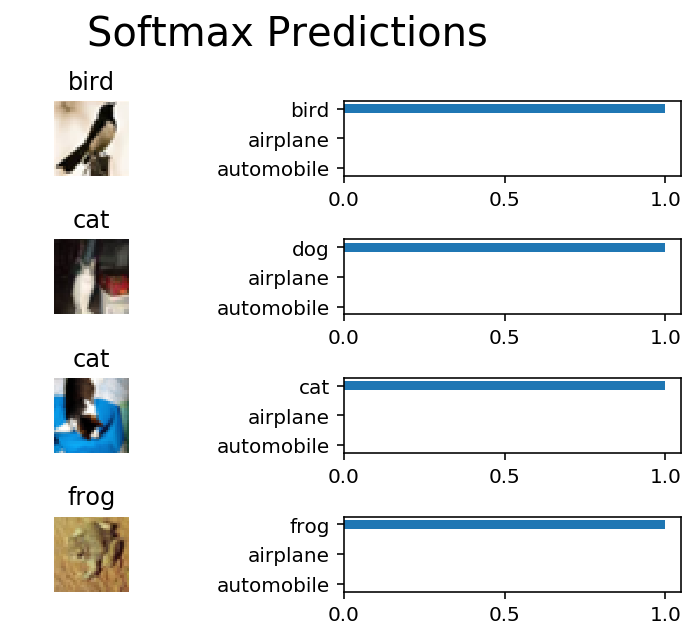

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.